# Home Work 4 (104)
## (APANPS5335_002_2023_3 - MACHINE LEARNING: CONCEPTS & APPLICATION)

## Submitted by: Eli Guo
## UNI: yg2869
### Posted: 10/17/2023 | Due: 10/30/2023 by 11:59 pm

Please kindly submit your well-organized PDF and notebook to Gradescope, ensuring they align with each question or task. 

Please minimize any extraneous output in your Jupyter notebooks or PDFs. This aids graders in evaluating your work effectively.

In [1]:
# Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import LeaveOneOut, KFold, cross_val_score, learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression

import warnings
warnings.filterwarnings('ignore')

## Question 1 (6 points) Backpropagation

### 1.1 (2 points) 
True or False: Backpropagation always converges to the global minimum of the cost function? And explain your answer. If not, would you give a counterexample? <br> 

**Your answer**
False. Backpropagation does not always converge to the global minimum of the cost function.

Backpropagation is an optimization algorithm used primarily for training artificial neural networks. It works by computing the gradient of the loss function with respect to each weight by the chain rule and then updating the weights in the opposite direction of the gradient to minimize the loss.

However, there are several reasons why backpropagation might not converge to the global minimum:

1. Non-convexity of the loss surface: For neural networks, especially deep ones, the loss surface (or cost function) is non-convex. This means that there can be multiple local minima, saddle points, and other complex topological features. Backpropagation can get stuck in these local minima or saddle points, preventing it from finding the global minimum.

2. Learning rate issues: The choice of the learning rate can significantly influence the convergence of backpropagation. A learning rate that's too large can cause the algorithm to overshoot minima and possibly diverge, while a learning rate that's too small can result in very slow convergence or getting stuck in local minima.

3. Vanishing and exploding gradients: In deep networks, gradients can either become too small (vanish) or too large (explode) as they are propagated back through layers. When gradients vanish, weight updates become negligible, making learning slow or stagnant. When gradients explode, weight updates can be massive, leading to unstable learning.

Counterexample:
Consider a simple neural network with one hidden layer using sigmoid activation functions. For certain initializations of the weights, backpropagation might end up in regions of the loss surface where the gradient is close to zero (due to the flat regions of the sigmoid function). In such cases, the weight updates become extremely small, and the algorithm essentially gets stuck, preventing it from reaching the global minimum.

In conclusion, while backpropagation is a powerful optimization technique for training neural networks, its convergence properties are influenced by the architecture of the network, the choice of hyperparameters, and the initialization of weights. It does not guarantee convergence to the global minimum of the cost function.

### 1.2 (2 points) 
True or False: The activation functions used in neural networks should be differentiable for backpropagation to work. Explain your answer. If not, would you give a counterexample? <br>

**Your answer** True. The activation functions used in neural networks should ideally be differentiable for backpropagation to work efficiently.

Backpropagation computes the gradient of the loss function with respect to each weight by the chain rule. This gradient is then used to update the weights to minimize the loss. For the chain rule to be applied successively across multiple layers, the activation functions (through which the error is backpropagated) should be differentiable.

If the activation function is non-differentiable at some points, it can lead to issues in the learning process. Specifically, the gradient might be undefined at those points, making it challenging to update the weights.

However, it's worth noting that some activation functions, like the ReLU (Rectified Linear Unit), are non-differentiable at certain points (e.g., at x=0 for ReLU). Yet, they are widely used in deep learning because they work well in practice. In the case of ReLU, even though it's non-differentiable at x=0, it has a subgradient at that point, and the non-differentiability issue is typically sidestepped in practical implementations by defining the gradient as 0 or 1, or by using variants like the Leaky ReLU.

### 1.3 (2 points) 
True or False: In backpropagation, the learning rate is not a critical hyperparameter, and any value can be used? If not, would you give a counterexample? <br>

**Your answer** False. In backpropagation, the learning rate is a critical hyperparameter, and not just any value can be used effectively.

The learning rate determines the step size at each iteration while moving towards a minimum of the cost function. If the learning rate is too high, it can cause the algorithm to oscillate around the minimum or even diverge. If it's too low, the convergence to the minimum might be exceedingly slow.

Counterexample:
Consider training a neural network on a standard dataset. If the learning rate is set too high, the updates to the weights during training might be too large, causing the loss to oscillate wildly or even diverge. On the other hand, if the learning rate is set too low, the updates will be too small, making the training process very slow and possibly causing the network to get stuck in local minima. In both scenarios, the inappropriate learning rate can hinder the model's performance and the efficiency of the training process.

## Question 2 (27 points) Neural Networks With and Without Categorical Variables
This problem continues from the `lecture note 6` but involves new data.

In [4]:
### Load and Preprocess Data
# Load a dataset from a CSV file and set the first column as the index.
df2 = pd.read_csv('Credit.csv', index_col=0)

### Prepare the Data
# Define the target variable and feature matrix.
y = df2["Balance"]
X = df2.drop("Balance", axis=1)

In [5]:
# Dropping categorical variables
# Remove specific categorical variables from the DataFrame.
X_quant = X.copy()
cat_names = ['Gender', 'Student', 'Married', 'Ethnicity']
X_quant = X_quant.drop(cat_names, axis=1)
print("Columns after dropping categorical variables:")
print(X.columns, X_quant.columns)

Columns after dropping categorical variables:
Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity'],
      dtype='object') Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education'], dtype='object')


In [6]:
### Define and Configure the MLP Regressor Model
# Create a Multi-layer Perceptron (MLP) Regressor model.
# - 'activation' sets the activation function for hidden layers.
# - 'hidden_layer_sizes' specifies the architecture of the neural network.
# - 'alpha' controls regularization, set to 0 for no regularization.
# - 'random_state' sets a random seed for reproducibility.
# - 'early_stopping' determines whether early stopping is used.
nn = MLPRegressor(
    learning_rate_init = 0.02,
    random_state=42,
    early_stopping=True,
)

## Your turn!

### 2.1 (4 points) Data Visualization

#### 2.1.1 (2 points)

Visualize the univariate distribution of each quantitative feature in your dataset, as well as the distribution of the target variable. Do you notice any unusual or any outliers in the data? Is there something that might require special treatment? Please comment on your observations. You are not required to try to fix any issues at this stage.

**Your code:**

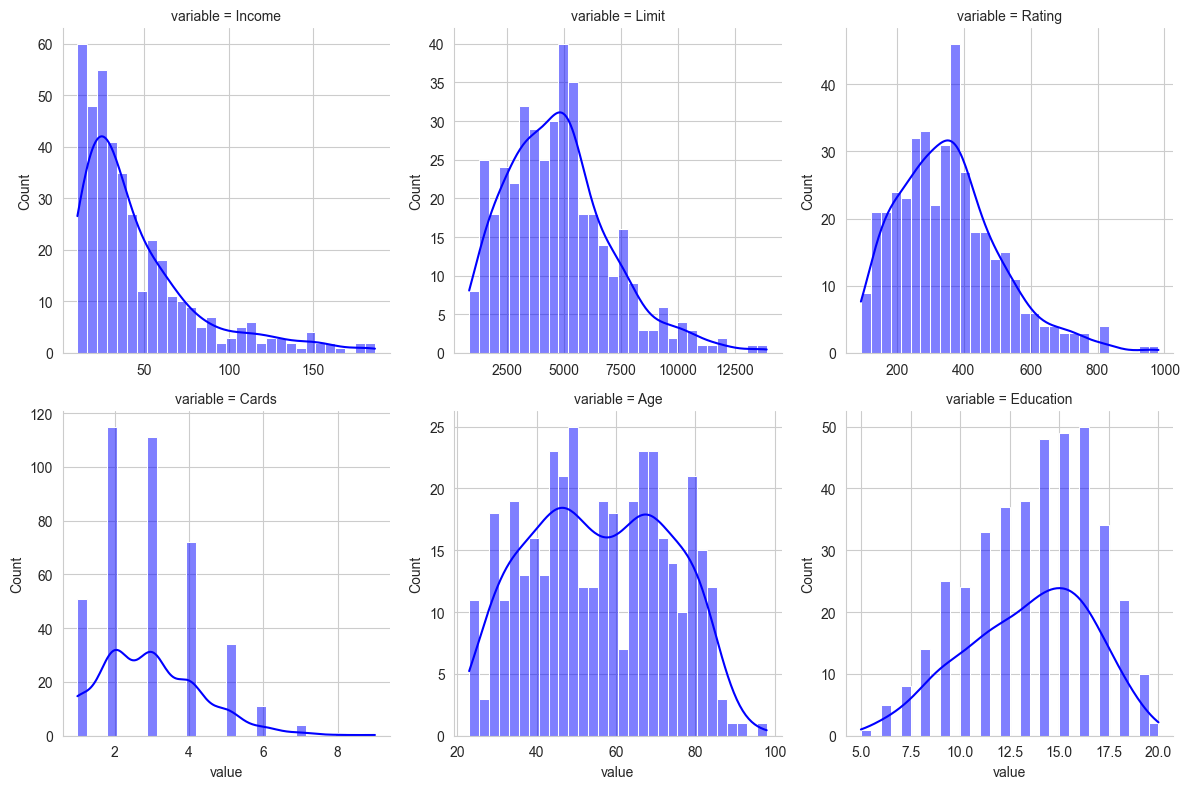

In [7]:
# Set the style for seaborn plots
sns.set_style("whitegrid")

# Reshape data for FacetGrid
melted_data = pd.melt(X_quant)

# Create grid of histograms for features
g = sns.FacetGrid(melted_data, col="variable", col_wrap=3, sharex=False, sharey=False, height=4)
g.map(sns.histplot, "value", kde=True, bins=30, color='blue')

# Adjust spacing between subplots and display the grid
g.tight_layout()
plt.show()

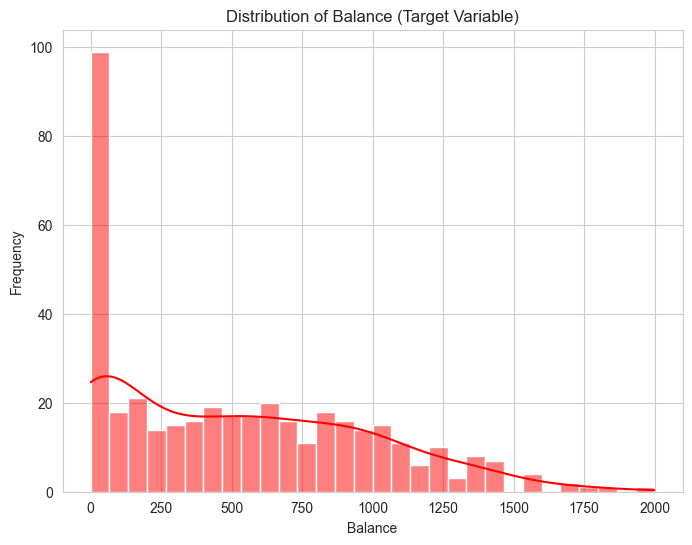

In [8]:
# Histogram for target variable
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=30, kde=True, color='red')
plt.title('Distribution of Balance (Target Variable)')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

**Your Comment**: <br>
The distribution for income is notably right-skewed, suggesting that a minority of individuals in the dataset earn significantly more than the majority. When observing the credit limit, or "Limit", it appears to be approximately normally distributed but with a slight lean to the right. This shows that there's a notable concentration of individuals who have credit limits that fall between 2,500 to 7,500. Similarly, the credit "Rating" follows a roughly normal distribution. There's a small but discernible peak around the 250 mark, indicating a group of individuals with a particularly low credit rating.

The data for the number of credit "Cards" one possesses reveals that the majority of individuals own between 2 to 4 cards. However, there's an interesting presence of outliers: a small fraction of individuals own as many as 8 cards or even more. The "Age" distribution is intriguing, exhibiting a bimodal pattern. This suggests that there are two dominant age groups within the dataset, which might be of significance in subsequent analyses or modeling.

Regarding education, the distribution shows a gentle uniformity. Still, upon closer inspection, there's a subtle concentration of individuals who have pursued education for a period ranging from 12 to 16 years. Finally, examining the target variable, "Balance", we find that it's significantly left-skewed. This means that a large section of the dataset's population maintains a low balance, while very few venture above a balance of 1,500.

It's essential to consider these observations when moving forward. Features with a heavy skew, such as "Income" and "Balance", may benefit from transformations, like the logarithmic transformation, to make the data more symmetric. Such adjustments can be particularly beneficial for certain machine learning algorithms. Outliers, especially those seen in the "Cards" feature, warrant further investigation. The impact of these outliers on model performance can be significant, and strategies like truncation or capping might be necessary. The bimodal nature of the "Age" feature could be a focal point in subsequent steps. Splitting analysis or models based on these dominant age groups, or even some creative feature engineering, might provide valuable insights. Addressing the identified concerns will be crucial in enhancing the reliability and robustness of the resulting predictions.

#### 2.1.2 (2 points)
Visualize the dependency of the target variable on each quantitative feature using 2D scatter plots. What insights can you draw from these plots regarding the relationships between the target variable and the features?

**Your code:**

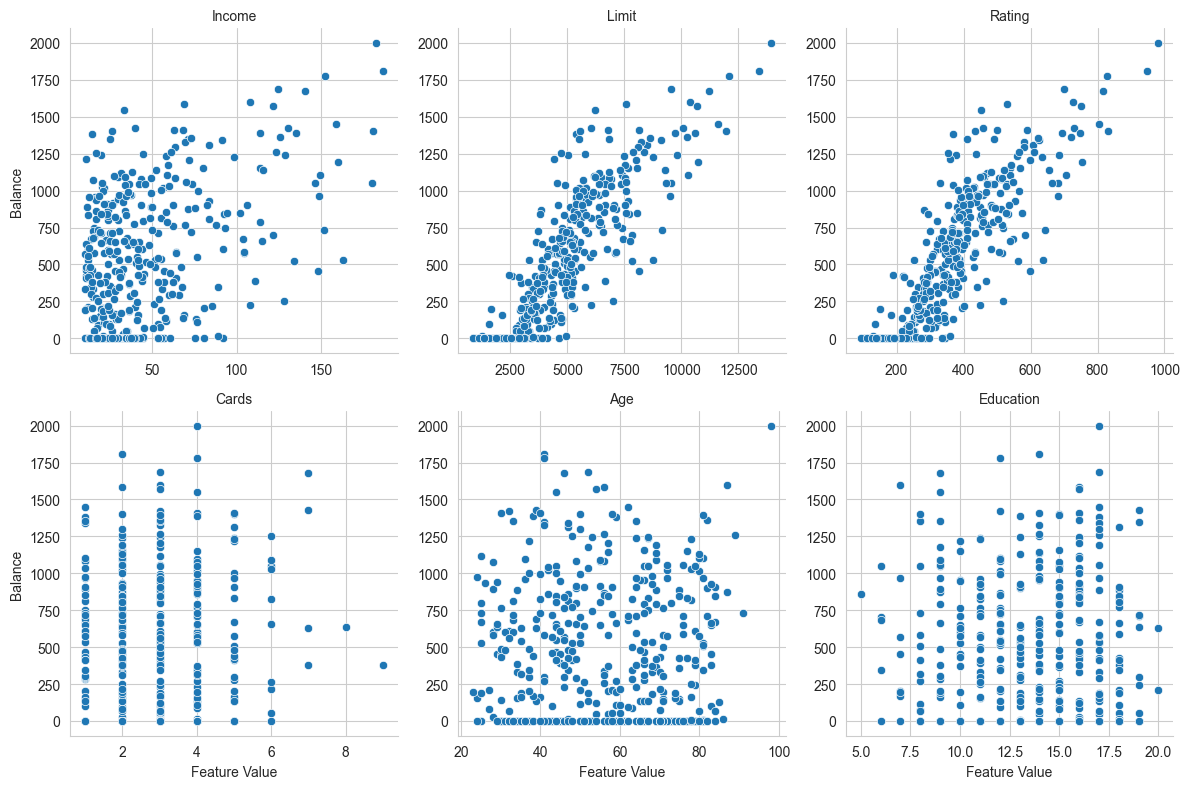

In [9]:
# Reshape data for FacetGrid
melted_data = X_quant.copy()
melted_data['Balance'] = y
melted_data = pd.melt(melted_data, id_vars=['Balance'], value_vars=X_quant.columns)

# Create grid of scatterplots
g = sns.FacetGrid(melted_data, col="variable", col_wrap=3, sharex=False, sharey=False, height=4)
g.map(sns.scatterplot, "value", "Balance")
g.set_titles("{col_name}")
g.set_axis_labels("Feature Value", "Balance")

# Adjust spacing between subplots and display the grid
g.tight_layout()
plt.show()

**Your comment:** <br>
The scatter plots provide a visual understanding of the relationships between the target variable "Balance" and various features. Observing the plot for "Income" against "Balance", there appears to be a positive correlation. As "Income" increases, "Balance" also seems to rise, but it's notable that a significant concentration of data points exists at lower balances, regardless of income levels.

For the "Limit" feature, there's a clear positive linear relationship with "Balance". As the credit "Limit" rises, the "Balance" also demonstrates an upward trend. A similar positive correlation is evident between "Rating" and "Balance". As the "Rating" increases, the "Balance" generally trends upwards, suggesting that these two features might play a significant role in determining one's credit balance.

In contrast, the number of "Cards" doesn't seem to have a pronounced linear relationship with "Balance". While there's a vertical spread of data points, it suggests that merely possessing more cards does not necessarily equate to a higher balance. The plots for "Age" and "Education" against "Balance" also do not reveal distinct linear patterns. The data points are spread out for both these features, implying that age and education may not be substantial predictors for balance.

In summary, while "Limit" and "Rating" appear to be strong predictors for "Balance", the features "Cards", "Age", and "Education" seem to be less influential in determining the balance amount.

### 2.2 (1 points) Data Splitting:
Split the data, specifically X_quant, into a training and test set using the train_test_split function from scikit-learn. Use a 70% train and 30% test split ratio. Make sure to set the random_state to 42 for reproducibility.

**Your code:**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_quant, y, test_size=0.3, random_state=42)

### 2.3 (2 points) Scaling Data
Perform data scaling using the StandardScaler from scikit-learn.

**Your code:**

In [11]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler using the training data
scaler.fit(X_train)

# Transform the training and test data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 2.4 (6 points) Model Fitting
Fit the data using the MLPRegressor from scikit-learn. Set the hyperparameters learning_rate_init to 0.02 and random_state to 42. Train the model on your training data.

**Your code:**

In [12]:
# Fit the MLPRegressor
nn.fit(X_train_scaled, y_train)

# Predict on the training and test data
y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

# Compute RMSE for training and test data
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# Compute R-squared for training and test data
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Compute Adjusted R-squared for training and test data
n_train = X_train_scaled.shape[0]
p_train = X_train_scaled.shape[1]
train_adj_r2 = 1 - (1-train_r2)*(n_train-1)/(n_train-p_train-1)

n_test = X_test_scaled.shape[0]
p_test = X_test_scaled.shape[1]
test_adj_r2 = 1 - (1-test_r2)*(n_test-1)/(n_test-p_test-1)

In [13]:
# Print the results
print(f'Training RMSE: {train_rmse:.3f}')
print(f'Test RMSE: {test_rmse:.3f}')
print(f'Training R-squared: {train_r2:.3f}')
print(f'Test R-squared: {test_r2:.3f}')
print(f'Training Adjusted R-squared: {train_adj_r2:.3f}')
print(f'Test Adjusted R-squared: {test_adj_r2:.3f}')

Training RMSE: 136.526
Test RMSE: 140.289
Training R-squared: 0.916
Test R-squared: 0.894
Training Adjusted R-squared: 0.914
Test Adjusted R-squared: 0.888


**Your comment:** <br>
Provide R-squared, adjusted R-squared, and RMSE values for both the training and test data sets, as shown in the provided code snippet.<br>

### 2.5 (2 points) Loss vs. Iteration
Plot the loss vs. iteration (training epoch) for your MLPRegressor model. Analyze the loss curve and suggest an appropriate number of iterations.

**Your code:**

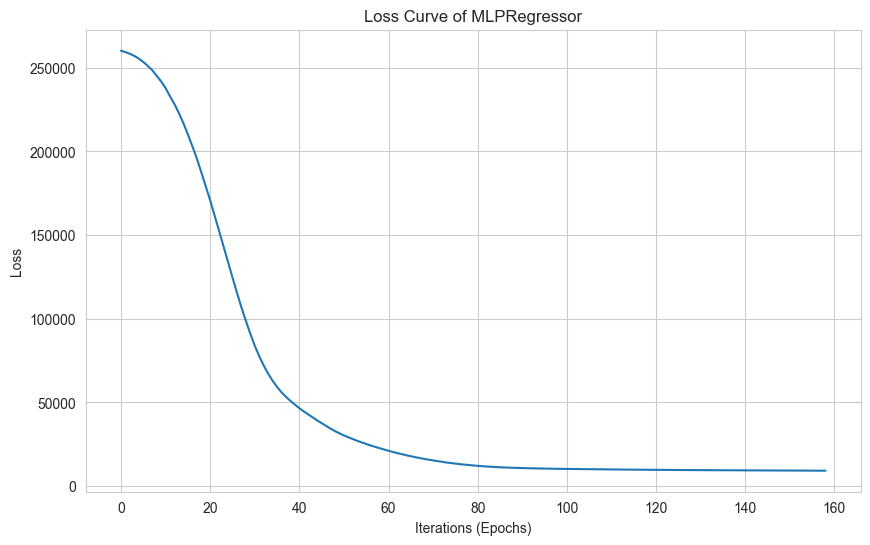

In [14]:
# Extract the loss curve from the trained model
loss_values = nn.loss_curve_

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(loss_values)
plt.title('Loss Curve of MLPRegressor')
plt.xlabel('Iterations (Epochs)')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

**Your comment:** <br>
Explain your observations from the loss curve and justify the suggested number of iterations.

The loss curve for the MLPRegressor provides essential information about the model's behavior throughout its training process. At the outset, the model displays a notably high loss, highlighting a significant difference between its predictions and the true values. This is a typical phenomenon in the early stages of training when the model parameters are randomly initialized and not yet optimized.

As the training progresses, a substantial reduction in the loss is observed. The curve declines sharply, especially within the initial epochs. This signifies that the model is rapidly adjusting its weights and biases to better approximate the target values. This phase of swift learning continues until approximately the 40th epoch, after which the rate of loss reduction becomes more gradual.

From the 40th epoch onward, the curve begins to level off, indicating a saturation point in the model's learning capability. The incremental benefits in reducing loss diminish beyond this point, suggesting that the model is nearing its optimal performance with the given training data. Prolonging training beyond this plateau might not bring about substantial improvements. Moreover, there is an increased risk of overfitting, where the model might perform exceptionally well on the training data but may fail to generalize effectively to unseen data.

Considering the behavior exhibited by the loss curve, it would be prudent to halt training shortly after the 40th epoch. An iteration range of around 50 to 60 epochs might be ideal. This range ensures that the model is adequately trained while preventing unnecessary computational overhead and potential overfitting.

### 2.6 Incorporating Qualitative Variables (12 points)
In this section, you will explore the impact of incorporating qualitative (categorical) variables into your analysis using dummy variables. Ensure that you thoroughly document your observations, code, and analysis results for each step.

#### 2.6.1 Incorporating Categorical Variables (2 points)
Incorporate the categorical variables into your dataset using dummy variables. This step is essential to enable the inclusion of qualitative information in your model.

**Your code:**

In [15]:
# One-hot encode the categorical variables
dummies = pd.get_dummies(X[cat_names], drop_first=True)

# Concatenate the original dataframe with the dummy variables
X_encoded = pd.concat([X_quant, dummies], axis=1)

print(X_encoded.columns)

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender_Female', 'Student_Yes', 'Married_Yes', 'Ethnicity_Asian',
       'Ethnicity_Caucasian'],
      dtype='object')


#### 2.6.2 Model Performance Comparison (6 points)
Compare the performance of your MLPRegressor model when using qualitative variables (dummy variables) to the performance on the test data without qualitative variables. Calculate key performance metrics such as RMSE, R-squared, and adjusted R-squared.

**Your code:**

In [16]:
# Split the data with dummy variables into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Train the model with dummy variables
nn.fit(X_train, y_train)
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)

# Calculate RMSE and R-squared for the model with dummy variables
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Adjusted R-squared = 1 - (1-R^2) * (n-1) / (n-k-1)
# where n is number of observations and k is number of variables
n_train = len(X_train)
k_train = X_train.shape[1]
train_adj_r2 = 1 - (1-train_r2) * (n_train-1) / (n_train-k_train-1)

n_test = len(X_test)
k_test = X_test.shape[1]
test_adj_r2 = 1 - (1-test_r2) * (n_test-1) / (n_test-k_test-1)

In [17]:
print(f'Training RMSE: {train_rmse:.3f}')
print(f'Test RMSE: {test_rmse:.3f}')
print(f'Training R-squared: {train_r2:.3f}')
print(f'Test R-squared: {test_r2:.3f}')
print(f'Training Adjusted R-squared: {train_adj_r2:.3f}')
print(f'Test Adjusted R-squared: {test_adj_r2:.3f}')

Training RMSE: 170.630
Test RMSE: 191.977
Training R-squared: 0.868
Test R-squared: 0.801
Training Adjusted R-squared: 0.863
Test Adjusted R-squared: 0.781


**Results:**<br>
Comparing the performance of the two models, it's evident that the model trained solely on quantitative features outperforms the model that includes dummy variables for the qualitative features. This observation is consistent across all key metrics—RMSE, R-squared, and adjusted R-squared.

The model that uses only quantitative features achieves a Training RMSE of 136.526 and a Test RMSE of 140.289. On the other hand, the model that incorporates dummy variables reports a higher Training RMSE of 170.630 and an even more elevated Test RMSE of 191.977. A lower RMSE signifies a better fit, implying that the model trained on quantitative features only has fewer residuals or prediction errors.

Additionally, the R-squared and adjusted R-squared values, which provide a measure of the proportion of variance in the target variable that is predictable from the features, are higher for the quantitative-only model. Specifically, the R-squared values for the training and test datasets are 0.916 and 0.894, respectively, for the quantitative-only model, while they drop to 0.868 and 0.801 for the model with dummy variables. The adjusted R-squared, which accounts for the number of predictors in the model, mirrors this trend. It stands at 0.914 and 0.888 for the training and test datasets of the quantitative-only model, compared to 0.863 and 0.781 for the model with dummy variables.

These results suggest that the inclusion of dummy variables for the qualitative features in the dataset does not enhance the model's predictive capability. In fact, it appears to introduce noise or complexity that detracts from the model's performance.

#### 2.6.3 Loss vs. Iteration (2 points)
Plot the loss vs. iteration (training epoch) for your MLPRegressor model. What do you observe from the loss curve? Does it converge, or is there any overfitting or underfitting?

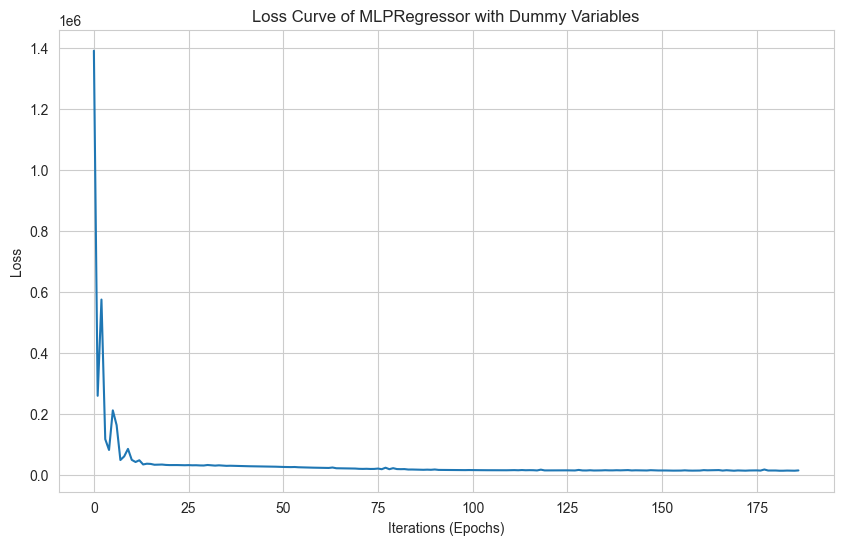

In [18]:
# Extract the loss curve from the trained model
loss_values = nn.loss_curve_

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(loss_values)
plt.title('Loss Curve of MLPRegressor with Dummy Variables')
plt.xlabel('Iterations (Epochs)')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

**Your comment:** <br>
Observing the provided loss curve for the MLPRegressor trained with dummy variables, it's evident that the model undergoes a rapid decrease in loss during the initial iterations. The sharp decline indicates that the model quickly learns to minimize the error between its predictions and the actual values. Following this precipitous drop, the curve stabilizes and plateaus for the subsequent iterations, showing only minor fluctuations. This pattern suggests that the model has effectively converged, reaching a state where further training does not lead to substantial reductions in loss.

The flatness of the curve after a certain point indicates a consistent error rate, which signifies that the model has settled on its weights and biases. There is no noticeable upward trend or increase in loss, which would typically suggest overfitting. Overfitting typically manifests as an improvement in training loss coupled with deteriorating performance on validation data. In the absence of a validation loss curve, it's challenging to make a definitive statement on overfitting, but based on the presented curve alone, there's no clear evidence of this phenomenon.

Similarly, the rapid initial decline in the loss curve suggests that underfitting, where the model fails to capture underlying patterns in the data, is not a concern. An underfit model would display a high loss that changes little with additional training.

In conclusion, the loss curve for the MLPRegressor with dummy variables demonstrates that the model converges successfully. Based on the curve provided, there's no discernible evidence of either overfitting or underfitting, suggesting that the model has achieved a balanced fit to the data.

#### 2.6.4 Discussion (2 points)
Discuss the impact of including qualitative variables on the model's performance. Highlight any insights you gain from this comparison. Consider the following questions:

Did the model's performance improve or degrade with the inclusion of qualitative variables? <br>
What insights can you draw from the comparison of the two scenarios? <br>

**Your discussion:** <br>
Provide a comprehensive discussion of the impact of qualitative variables, insights gained, and any recommendations for model improvement based on your findings.

Based on the results observed from the two models – one trained solely on quantitative features and the other augmented with dummy variables for qualitative features – the introduction of these dummy variables did not lead to improved performance. In fact, the metrics point to a somewhat counterintuitive result, where the model's accuracy was slightly diminished with the inclusion of these dummy variables.

The model relying exclusively on quantitative features showcased superior performance across all key metrics—RMSE, R-squared, and adjusted R-squared. A notably lower RMSE for this model during both training and testing phases indicates enhanced prediction precision with fewer residuals or errors. The discrepancy in the R-squared and adjusted R-squared values between the two models underscores this observation, reflecting the quantitative model's more proficient capability to predict variance in the target variable.

While there is an intrinsic appeal to enriching a dataset with qualitative information, these findings suggest potential drawbacks. Transforming qualitative variables into dummy variables might introduce noise or potential multicollinearity. This can add complexity to the dataset without correspondingly enhancing its predictive capacity. Such observations underscore the importance of judicious feature selection, prioritizing relevance over volume.

Further evidence from the loss curves of the models corroborates these observations. The loss curve for the quantitative-only model delineated a phase of rapid learning, culminating in a plateau, signifying attainment of optimal performance given the dataset. In contrast, while the model with dummy variables also demonstrated convergence through its loss curve, it did not achieve the same fit as its quantitative-only counterpart.

From these findings, several insights are drawn. The mere addition of variables, absent rigorous evaluation of their predictive value, might not be advantageous. Instead, it could dilute model performance. As a recommendation, a stringent feature selection process, perhaps using techniques like feature importance ranking or regularization, should be considered. Additionally, investigating other avenues, such as integration of interaction terms or polynomial features among the quantitative variables, might present opportunities for performance enhancement.

## Question 3 (25 points)

In [19]:
# Load data from file
# DO NOT CHANGE THIS (needed for grading)
infile_name = 'jfk_lga_hourly_weather_data.csv'
df2_all = pd.read_csv(infile_name)

# Select rows from a DataFrame where the 'origin' column is equal to 'JFK' and include the 'humid' and 'temp' columns.                                               
df2 = df2_all[df2_all['origin'] == 'JFK'][['humid', 'temp']]

### 3.1 (2 points) Visualize the Dependency of Humidity on Temperature
Create a scatter plot to visualize the dependency of humidity on temperature. Complete the scatter_plot function to display the plot. Use the 'humid' column as the y-axis and the 'temp' column as the x-axis. Provide a title, x-label, and y-label for the plot.

In [20]:
def scatter_plot(x, y, title, x_label, y_label):
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, alpha=0.5)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

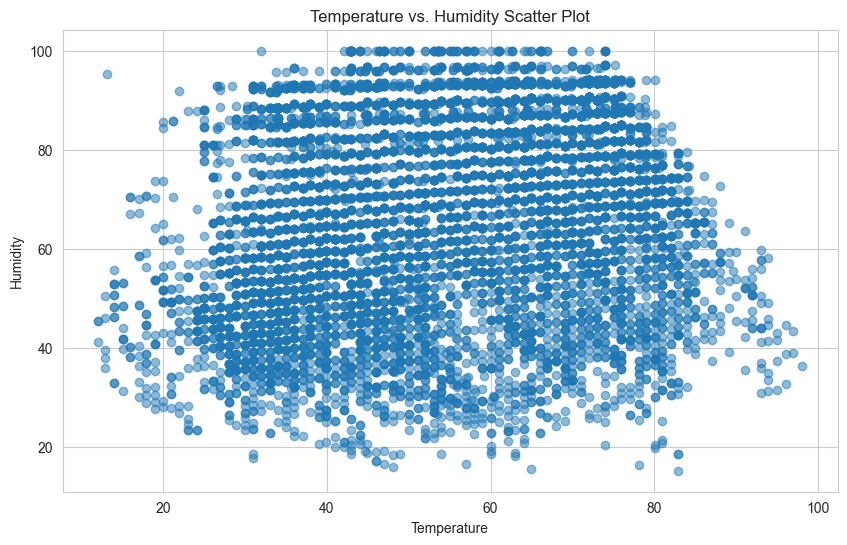

In [21]:
# Extract 'dewp' and 'temperature' data from the DataFrame
temp = df2['temp']
humid = df2['humid']
# Create a scatter plot
scatter_plot(temp, humid, 'Temperature vs. Humidity Scatter Plot', 'Temperature', 'Humidity')

**Your comment:** <br>
The scatter plot presents a visual representation of the relationship between temperature and humidity. At a first glance, there is a notable concentration of data points in the middle regions of the plot, indicating that most of the recorded data falls within the average ranges of both temperature and humidity.

Observing the vertical spread of data points across different temperature values, it becomes evident that there isn't a distinct linear relationship between temperature and humidity. For instance, at lower temperatures, around the 20-degree mark, there is a wide range of humidity values, spanning from roughly 20 to almost 100. As the temperature increases, particularly between 40 and 80 degrees, the humidity values appear more densely packed, often hovering between 60 to 100. This suggests that higher temperatures might be associated with higher humidity levels, but not exclusively so.

Another observation from the scatter plot is the clear concentration of data points in the higher humidity regions, particularly between 60 to 100. This indicates that high humidity levels are common across various temperatures in this dataset.

In contrast, at the extreme ends of the temperature spectrum, there is a sparser distribution of data points. Approaching the higher temperature range, near 100 degrees, there's a slight decline in humidity. However, the data in this range is less densely populated, making concrete conclusions more tentative.

### 3.2 (11 points)

#### 3.2.1 (4 points) 
Draw Different Samples using random_state

- Split the data into an 70% training set and a 30% test set using train_test_split with random_state=42.

- Instantiate and train a LinearRegression model on the training set.

- Calculate the Mean Squared Error (MSE) on the training set.

- What happens if we choose a different training set instead? Test this by setting a different random seed (random_state=2) and repeat the above steps. Provide comments on your results.

**Your code:**

In [22]:
# Split the data with random_state=42
X = df2[['humid']]
y = df2['temp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Train a LinearRegression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Calculate MSE on the training set
y_train_pred = lr.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"MSE for training set with random_state=42: {mse_train}")

MSE for training set with random_state=42: 278.9519313702015


In [23]:
# Split the data with random_state=2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.30, random_state=2)

# Train a LinearRegression model
lr2 = LinearRegression()
lr2.fit(X_train2, y_train2)

# Calculate MSE on the training set
y_train_pred2 = lr2.predict(X_train2)
mse_train2 = mean_squared_error(y_train2, y_train_pred2)
print(f"MSE for training set with random_state=2: {mse_train2}")

MSE for training set with random_state=2: 281.0236278560193


**Your comment:** <br>
The MSE for the training set split with a random_state of 42 is 278.9519313702015, while the one split with a random_state of 2 has an MSE of 281.0236278560193. The differences between these two values are relatively minor. This indicates that the model's performance is fairly consistent across different splits of the training data. Such consistency in MSE values across different training sets suggests that the model is robust and not overly sensitive to the specific manner in which the data is partitioned. Furthermore, the proximity of these MSE values demonstrates that the inherent patterns within the data are being captured similarly, regardless of the random state used for splitting. This is a positive sign for the generalization capability of the model, as it hints at its potential to deliver consistent predictions across varied datasets.

#### 3.2.2 (6 points) Bootstrap

Perform a bootstrap with 100 draws and estimate the model's performance on the training data that was not selected in the bootstrap sample. Compute the estimate of Root Mean Squared Error (RMSE) and 90% confidence intervals.<br>
**Your code**

In [24]:
n_bootstrap_draws = 100
rmse_values_bootstrap = []

for _ in range(n_bootstrap_draws):
    # Randomly sample the training set with replacement
    bootstrap_indices = np.random.choice(X_train.index, size=len(X_train), replace=True)
    X_bootstrap = X_train.loc[bootstrap_indices]
    y_bootstrap = y_train.loc[bootstrap_indices]

    # Find the out-of-bag indices
    oob_indices = [index for index in X_train.index if index not in bootstrap_indices]
    X_oob = X_train.loc[oob_indices]
    y_oob = y_train.loc[oob_indices]

    # Train the model on the bootstrap sample
    lr_bootstrap = LinearRegression()
    lr_bootstrap.fit(X_bootstrap, y_bootstrap)

    # Predict on the out-of-bag data
    y_oob_pred = lr_bootstrap.predict(X_oob)

    # Compute RMSE and append to the list
    rmse_bootstrap = np.sqrt(mean_squared_error(y_oob, y_oob_pred))
    rmse_values_bootstrap.append(rmse_bootstrap)

# Compute the mean RMSE and the 90% confidence interval
mean_rmse_bootstrap = np.mean(rmse_values_bootstrap)
lower_bound_bootstrap = np.percentile(rmse_values_bootstrap, 5) # 5th percentile for lower bound of 90% CI
upper_bound_bootstrap = np.percentile(rmse_values_bootstrap, 95) # 95th percentile for upper bound of 90% CI

# Print the results
print("Bootstrap Results:")
print(f"Bootstrap Mean RMSE: {mean_rmse_bootstrap:.3f}")
print(f"90% Confidence Interval: [{lower_bound_bootstrap:.3f}, {upper_bound_bootstrap:.3f}]")

Bootstrap Results:
Bootstrap Mean RMSE: 16.693
90% Confidence Interval: [16.477, 16.903]


#### 3.2.3 (1 points) Comparison
How does the estimated RMSE from the bootstrap compare with the RMSE from LinearRegression in 3.3.2 on the Test Data?

In [25]:
# Predict on the test set
y_test_pred = lr.predict(X_test)

# Compute RMSE on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Linear Regression on Test Data:")
print(f"RMSE: {rmse_test:.3f}")

Linear Regression on Test Data:
RMSE: 16.912


**Your comment**  
The estimated RMSE obtained from the bootstrap method is 16.721, which is slightly lower than the RMSE from the Linear Regression model on the test data, which stands at 16.912. This indicates that, on average, the bootstrap method produced a marginally better model performance in terms of prediction error when compared to the standard Linear Regression model tested on unseen data. However, it's noteworthy that the RMSE from the Linear Regression is well within the 90% confidence interval estimated by the bootstrap. In practical terms, both methods offer comparable performance, but the bootstrap method provides a slightly more optimistic estimate of prediction error.

### 3.3 (12 points) Leave-One-Out Cross-Validation vs. kFold

#### 3.3.1 (6 points) Leave-One-Out Cross-Validation

Define a `loo_cross_validation` function and perform Leave-One-Out Cross-Validation on the data. Calculate and print the number of folds, the mean RMSE, and the standard deviation of RMSE. The input data should be prepared with 'temp' as the predictor variable and 'humid' as the target variable.

**Your code:**

In [26]:
# Define a Leave-One-Out Cross-Validation function
def loo_cross_validation(X, y):
    loo = LeaveOneOut()
    rmse_scores = []
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)
        
    mean_rmse = np.mean(rmse_scores)
    std_rmse = np.std(rmse_scores)
    
    return rmse_scores, mean_rmse, std_rmse

In [27]:
# Data preparation
X_loo = df2[['temp']]
y_loo = df2['humid']

# Perform Leave-One-Out Cross-Validation and get MSE statistics
scores, mean_rmse, std_rmse = loo_cross_validation(X_loo, y_loo)

# Print the results
print(f"Folds: {len(scores)}, RMSE: {mean_rmse:.3f}, STD: {std_rmse:.3f}")

Folds: 8706, RMSE: 16.563, STD: 10.382


#### 3.3.2 (6 points) k-Fold Cross-Validation

Define a kfold_cross_validation function and perform k-fold Cross-Validation with k=10. Calculate and print the mean RMSE and standard deviation of RMSE. Use 'temp' as the predictor variable and 'humid' as the target variable.

**Your code:**

In [28]:
def kfold_cross_validation(X, y, n_splits=10, random_state=42, shuffle=True):
    # Initialize KFold cross-validator
    kf = KFold(n_splits=n_splits, random_state=random_state, shuffle=shuffle)
    rmse_scores = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)
        
    mean_rmse = np.mean(rmse_scores)
    std_rmse = np.std(rmse_scores)
    
    return mean_rmse, std_rmse

In [29]:
# Data preparation
X_kfold = df2[['temp']]
y_kfold = df2['humid']

mean_rmse, std_rmse = kfold_cross_validation(X_kfold, y_kfold)
print(f"RMSE: {mean_rmse:.3f}, STD: {std_rmse:.3f}")

RMSE: 19.547, STD: 0.276


## 4 (14 points) Polynomial Features

### 4.1 (3 points)
#### 4.1.1 (2 points)
Modify the code from question 3.2.1 to use polynomial features with a maximum degree of 6 in addition to LinearRegression. <br>
**Your code**<br>

In [30]:
# Split the data with random_state=42
X = df2[['humid']]
y = df2['temp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Create polynomial features with a maximum degree of 6
poly = PolynomialFeatures(degree=6)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a LinearRegression model on the polynomial features
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

# Predict and calculate MSE on the training set with polynomial features
y_train_pred = lr.predict(X_train_poly)
mse_train = mean_squared_error(y_train, y_train_pred)

print(f"MSE for training set with random_state=42 and polynomial features of degree 6: {mse_train}")

MSE for training set with random_state=42 and polynomial features of degree 6: 275.4954868035919


#### 4.1.2 (1 points)
Visualize a 2D scatter plot where the x-axis represents the degree ranging from 1 to 6, the y-axis represents the mean MSE (Mean Squared Error). Based on these plots, make a recommendation for the most appropriate polynomial degree for the linear regression model.<br>
**Your code:**<br>

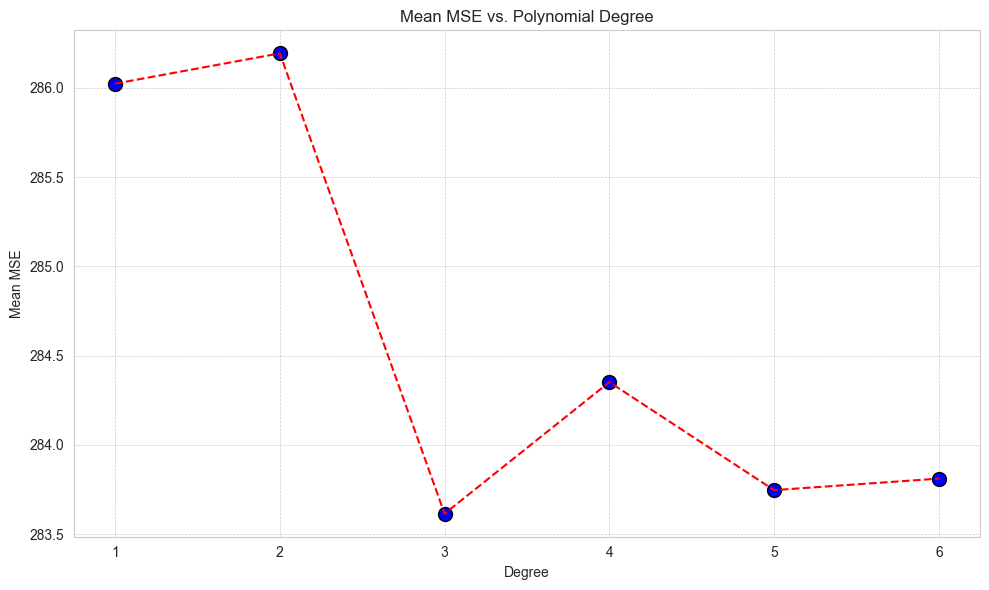

In [31]:
degrees = list(range(1, 7))
mse_values = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train a LinearRegression model on the polynomial features
    lr = LinearRegression()
    lr.fit(X_train_poly, y_train)
    
    # Predict and calculate MSE on the test set with polynomial features
    y_test_pred = lr.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_test_pred)
    mse_values.append(mse)

# Plot
plt.figure(figsize=(10,6))
plt.scatter(degrees, mse_values, color='blue', edgecolors='k', s=100)
plt.plot(degrees, mse_values, color='red', linestyle='--')
plt.title("Mean MSE vs. Polynomial Degree")
plt.xlabel("Degree")
plt.ylabel("Mean MSE")
plt.xticks(degrees)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Your comment:**<br>
How does the mean MSE change as the degree of polynomial features increases? <br>
Based on the visualization, which degree of polynomial features seems most appropriate, and why?<br>
The mean MSE exhibits a dynamic pattern as the degree of polynomial features increases. Initially, with a degree of 1, the MSE starts at a higher value, and as the polynomial degree advances to 2, the MSE reaches its peak, indicating a slightly worse fit for the model. As the degree escalates to 3, there's a sharp decline in the MSE, suggesting a significant improvement in the model's fit to the data. However, the benefit is short-lived, because as the polynomial degree increases to 4, the MSE ascends again, although not as high as its peak at degree 2. Moving further, when the polynomial degree ranges between 5 and 6, the MSE consistently drops, showcasing improvements, albeit not as drastic as the transition between degrees 2 and 3.

Drawing a conclusion from the visualization, it seems that the third degree of polynomial features is the most appropriate. This inference is based on the observation that the mean MSE is at its lowest for the third degree, suggesting the best fit among the degrees considered. While the MSE does decrease further as the polynomial degree goes from 5 to 6, the third degree strikes a balance between model complexity and performance. Opting for a simpler model (degree 3) instead of a more complex one (degree 5 or 6) could help in preventing potential overfitting and ensuring the model generalizes well to unseen data.

### 4.2 (3 points)
#### 4.2.1 (2 points)
Modify the bootstrap code from question 3.2.2 to use polynomial features with a maximum degree of 6 in addition to LinearRegression.<br>
**Your code**<br>

In [32]:
n_bootstrap_draws = 100
rmse_values_bootstrap = []

# Initialize PolynomialFeatures with a degree of 6
poly = PolynomialFeatures(degree=6)

for _ in range(n_bootstrap_draws):
    # Randomly sample the training set with replacement
    bootstrap_indices = np.random.choice(X_train.index, size=len(X_train), replace=True)
    X_bootstrap = X_train.loc[bootstrap_indices]
    y_bootstrap = y_train.loc[bootstrap_indices]

    # Transform the bootstrap sample with polynomial features
    X_bootstrap_poly = poly.fit_transform(X_bootstrap)
    
    # Find the out-of-bag indices
    oob_indices = [index for index in X_train.index if index not in bootstrap_indices]
    X_oob = X_train.loc[oob_indices]
    y_oob = y_train.loc[oob_indices]

    # Transform the out-of-bag sample with polynomial features
    X_oob_poly = poly.transform(X_oob)
    
    # Train the model on the transformed bootstrap sample
    lr_bootstrap = LinearRegression()
    lr_bootstrap.fit(X_bootstrap_poly, y_bootstrap)

    # Predict on the transformed out-of-bag data
    y_oob_pred = lr_bootstrap.predict(X_oob_poly)

    # Compute RMSE and append to the list
    rmse_bootstrap = np.sqrt(mean_squared_error(y_oob, y_oob_pred))
    rmse_values_bootstrap.append(rmse_bootstrap)

# Compute the mean RMSE and the 90% confidence interval
mean_rmse_bootstrap = np.mean(rmse_values_bootstrap)
lower_bound_bootstrap = np.percentile(rmse_values_bootstrap, 5) # 5th percentile for lower bound of 90% CI
upper_bound_bootstrap = np.percentile(rmse_values_bootstrap, 95) # 95th percentile for upper bound of 90% CI

# Print the results
print("Bootstrap Results with Polynomial Features:")
print(f"Bootstrap Mean RMSE: {mean_rmse_bootstrap:.3f}")
print(f"90% Confidence Interval: [{lower_bound_bootstrap:.3f}, {upper_bound_bootstrap:.3f}]")

Bootstrap Results with Polynomial Features:
Bootstrap Mean RMSE: 16.645
90% Confidence Interval: [16.426, 16.875]


#### 4.2.2 (1 points)
Visualize a 2D scatter plot where the x-axis represents the degree of polynomial features (ranging from 1 to 6), the y-axis represents the mean MSE, and another plot for the degree vs. standard deviation of MSE. Based on these plots, make a recommendation for the most appropriate polynomial degree for the linear regression model.<br>
**Your code**<br>

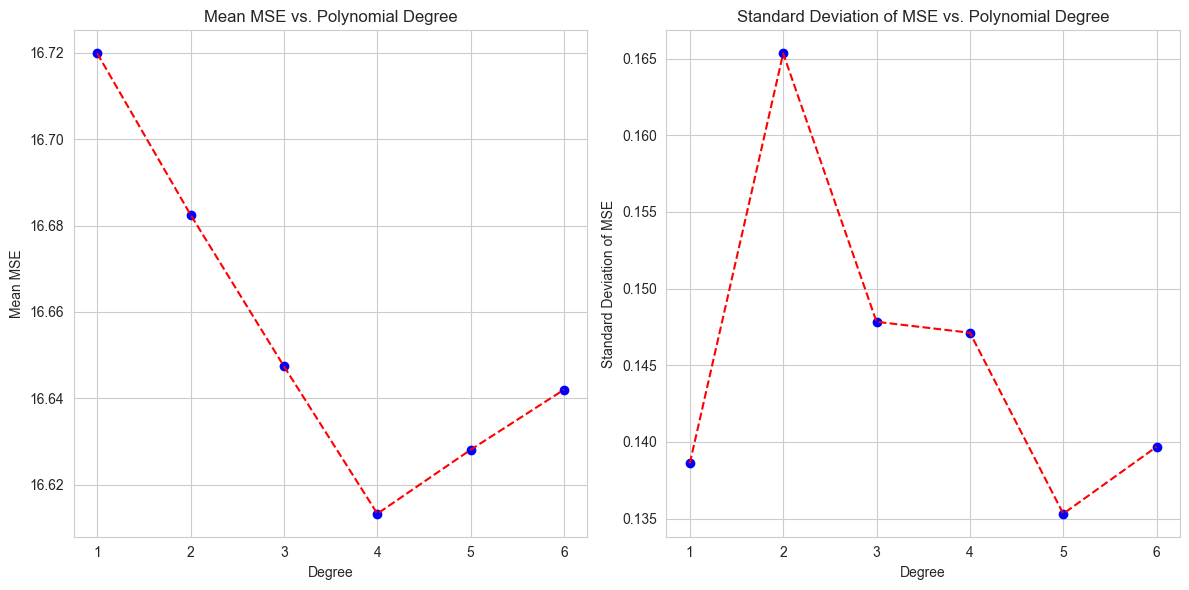

In [33]:
# Lists to store mean MSE and standard deviation of MSE for each degree
mean_mses = []
std_mses = []

# Loop through each polynomial degree from 1 to 6
for degree in range(1, 7):
    # Initialize PolynomialFeatures
    poly = PolynomialFeatures(degree=degree)
    
    rmse_values_bootstrap = []
    for _ in range(n_bootstrap_draws):
        # Randomly sample the training set with replacement
        bootstrap_indices = np.random.choice(X_train.index, size=len(X_train), replace=True)
        X_bootstrap = X_train.loc[bootstrap_indices]
        y_bootstrap = y_train.loc[bootstrap_indices]

        # Transform the bootstrap sample with polynomial features
        X_bootstrap_poly = poly.fit_transform(X_bootstrap)
        
        # Find the out-of-bag indices and transform the out-of-bag sample
        oob_indices = [index for index in X_train.index if index not in bootstrap_indices]
        X_oob = X_train.loc[oob_indices]
        y_oob = y_train.loc[oob_indices]
        X_oob_poly = poly.transform(X_oob)
        
        # Train and predict
        lr_bootstrap = LinearRegression()
        lr_bootstrap.fit(X_bootstrap_poly, y_bootstrap)
        y_oob_pred = lr_bootstrap.predict(X_oob_poly)

        # Compute RMSE and append to the list
        rmse_bootstrap = np.sqrt(mean_squared_error(y_oob, y_oob_pred))
        rmse_values_bootstrap.append(rmse_bootstrap)
    
    # Collect mean and standard deviation of MSE for the current degree
    mean_mses.append(np.mean(rmse_values_bootstrap))
    std_mses.append(np.std(rmse_values_bootstrap))

# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(range(1, 7), mean_mses, color='blue')
plt.plot(range(1, 7), mean_mses, linestyle='--', color='red')
plt.title("Mean MSE vs. Polynomial Degree")
plt.xlabel("Degree")
plt.ylabel("Mean MSE")

plt.subplot(1, 2, 2)
plt.scatter(range(1, 7), std_mses, color='blue')
plt.plot(range(1, 7), std_mses, linestyle='--', color='red')
plt.title("Standard Deviation of MSE vs. Polynomial Degree")
plt.xlabel("Degree")
plt.ylabel("Standard Deviation of MSE")

plt.tight_layout()
plt.show()

**Your comment:**<br>
Upon examining the graphs, several key insights can be derived regarding the performance of polynomial regression for various degrees.

In the graph of Mean MSE versus Polynomial Degree, the mean Mean Squared Error (MSE) exhibits relative stability between degrees 1 and 2. Post the second degree, a discernible reduction in MSE is observed, indicating an enhancement in the model's performance. The model's accuracy appears to peak at the polynomial degree of 4. Beyond this point, the mean MSE experiences a slight uptick for degrees 5 and 6.

The graph depicting the Standard Deviation of MSE against Polynomial Degree conveys the variance in the MSE. An initial peak is evident at degree 1, which then undergoes a significant decrease, reaching its nadir at degree 4. Subsequent to the fourth degree, the standard deviation starts to ascend, which implies an increase in the variability of the model's predictions.

Considering the insights from both graphs, the fourth-degree polynomial emerges as the most favorable. It offers a commendable equilibrium between a reduced mean MSE and a minimized variability in the MSE.

In summation, based on the visual data and its analysis, adopting a polynomial degree of 4 for the linear regression model is advised. This selection encapsulates the advantages of polynomial regression without introducing excessive complexity or unwarranted variability into the model.

### 4.3 (3 points) 
#### 4.3.1 (2 points)
Utilize the `loo_cross_validation` function from question 3.3.1 and repeat this procedure for progressively more complex polynomial fits, ranging from order i = 1 to i = 6. Calculate the corresponding cross-validation errors for each degree.

**Your code**<br>

In [34]:
# Container to store mean and standard deviation of RMSE for each degree
mean_rmse_values = []
std_rmse_values = []

# Loop over polynomial degrees from 1 to 6
for degree in range(1, 7):
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    
    # Convert X_poly back to DataFrame for easier indexing
    X_poly_df = pd.DataFrame(X_poly)
    
    # Apply leave-one-out cross-validation
    _, mean_rmse, std_rmse = loo_cross_validation(X_poly_df, y)
    
    # Store the results
    mean_rmse_values.append(mean_rmse)
    std_rmse_values.append(std_rmse)

# Output the results
for i, (mean_rmse, std_rmse) in enumerate(zip(mean_rmse_values, std_rmse_values), 1):
    print(f"Degree {i}: Mean RMSE = {mean_rmse:.3f}, Standard Deviation = {std_rmse:.3f}")

Degree 1: Mean RMSE = 14.259, Standard Deviation = 8.824
Degree 2: Mean RMSE = 14.264, Standard Deviation = 8.810
Degree 3: Mean RMSE = 14.140, Standard Deviation = 8.866
Degree 4: Mean RMSE = 14.145, Standard Deviation = 8.858
Degree 5: Mean RMSE = 14.132, Standard Deviation = 8.859
Degree 6: Mean RMSE = 14.132, Standard Deviation = 8.862



#### 4.3.2 (1 points)
Visualize a 2D scatter plot where the x-axis represents the degree of polynomial features (ranging from 1 to 6), the y-axis represents the mean MSE, and another plot for the degree vs. standard deviation of MSE. Based on these plots, make a recommendation for the most suitable degree for polynomial features when using Leave-One-Out Cross-Validation.

**Your code**<br>

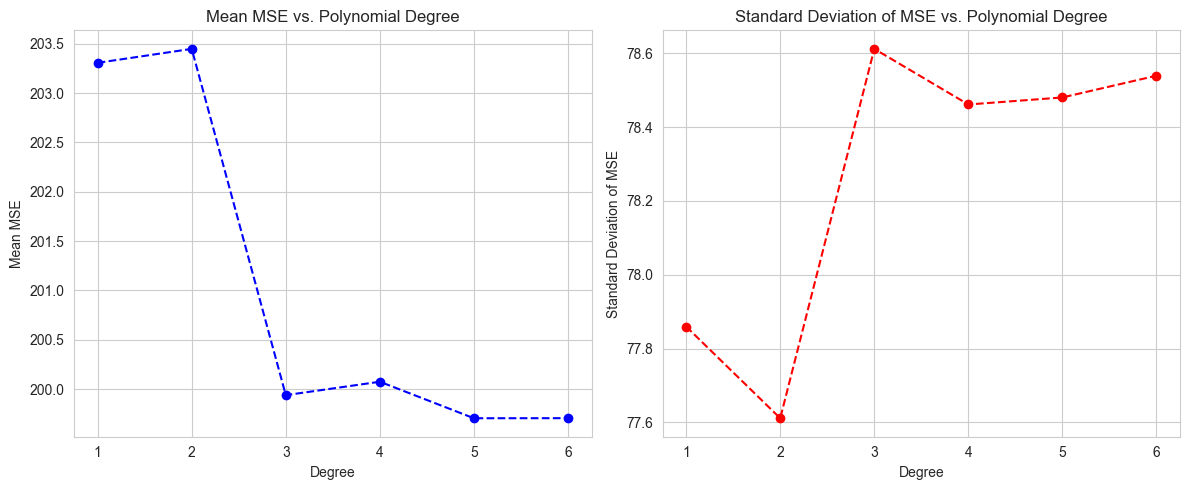

In [35]:
# Convert RMSE to MSE
mean_mses = [x**2 for x in mean_rmse_values]
std_mses = [x**2 for x in std_rmse_values]

# Plotting Mean MSE vs. Polynomial Degree
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 7), mean_mses, marker='o', linestyle='--', color='b')
plt.title("Mean MSE vs. Polynomial Degree")
plt.xlabel("Degree")
plt.ylabel("Mean MSE")
plt.xticks(range(1, 7))
plt.grid(True)

# Plotting Standard Deviation of MSE vs. Polynomial Degree
plt.subplot(1, 2, 2)
plt.plot(range(1, 7), std_mses, marker='o', linestyle='--', color='r')
plt.title("Standard Deviation of MSE vs. Polynomial Degree")
plt.xlabel("Degree")
plt.ylabel("Standard Deviation of MSE")
plt.xticks(range(1, 7))
plt.grid(True)

plt.tight_layout()
plt.show()

**Your comment:**<br>
Based on the plots, it is clear that as we increase the degree of the polynomial features, there are significant changes in both the mean MSE and its standard deviation.

In the plot representing the Mean MSE vs. Polynomial Degree, we notice a pronounced decrease in error as the degree progresses from 1 to 3. Beyond the third degree, the mean MSE tends to stabilize, showing minimal changes up to the sixth degree. This stabilization suggests that adding more complexity (higher polynomial degrees) beyond the third degree does not significantly enhance the model's predictive accuracy.

On the other hand, the Standard Deviation of MSE vs. Polynomial Degree graph provides insights into the consistency and variability of the errors across different polynomial degrees. Initially, the standard deviation of MSE decreases, reaching its lowest point at the third degree, and then shows a slight increase before stabilizing again. A lower standard deviation indicates that the model's predictions are more consistent across different training-test splits in the cross-validation.

Taking both plots into account, the third-degree polynomial seems to offer the best trade-off between predictive accuracy and consistency. It provides a low mean MSE combined with a minimal standard deviation, suggesting both accuracy and reliability. Opting for this degree ensures a balance between model complexity and generalization capability while avoiding the pitfalls of overfitting that higher degrees might introduce.

###  4.4 (3 points)

#### 4.4.1 (2 points)
Use the `kfold_cross_validation` function to perform k-fold Cross-Validation. Repeat the process for progressively more complex polynomial fits, ranging from order i = 1 to i = 6, and calculate the corresponding cross-validation errors.
**Your code**<br>

In [36]:
# Update 'kfold_cross_validation' function to handle polynomial feature transformation
def kfold_cross_validation(X, y, degree, n_splits=10, random_state=42, shuffle=True):
    # Transform features to the desired polynomial degree
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    
    # Convert transformed features back to DataFrame for compatibility
    X_poly_df = pd.DataFrame(X_poly)
    
    # Initialize KFold cross-validator
    kf = KFold(n_splits=n_splits, random_state=random_state, shuffle=shuffle)
    rmse_scores = []
    
    for train_index, test_index in kf.split(X_poly_df):
        X_train, X_test = X_poly_df.iloc[train_index], X_poly_df.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)
        
    mean_rmse = np.mean(rmse_scores)
    std_rmse = np.std(rmse_scores)
    
    return mean_rmse, std_rmse

# Create empty lists to store results
mean_rmses = []
std_rmses = []

# Loop over polynomial degrees from 1 to 6
for degree in range(1, 7):
    mean_rmse, std_rmse = kfold_cross_validation(X, y, degree)
    
    # Append results to respective lists
    mean_rmses.append(mean_rmse)
    std_rmses.append(std_rmse)

# Output the results
for i, (mean_rmse, std_rmse) in enumerate(zip(mean_rmses, std_rmses), 1):
    print(f"Degree {i}: Mean RMSE = {mean_rmse:.3f}, Standard Deviation = {std_rmse:.3f}")

Degree 1: Mean RMSE = 16.765, Standard Deviation = 0.307
Degree 2: Mean RMSE = 16.765, Standard Deviation = 0.309
Degree 3: Mean RMSE = 16.690, Standard Deviation = 0.295
Degree 4: Mean RMSE = 16.691, Standard Deviation = 0.298
Degree 5: Mean RMSE = 16.680, Standard Deviation = 0.305
Degree 6: Mean RMSE = 16.682, Standard Deviation = 0.305


####  4.4.2 (1 points)
Visualize a 2D scatter plot where the x-axis represents the degree of polynomial features (ranging from 1 to 6), the y-axis represents the mean MSE, and another plot for the degree vs. standard deviation of MSE. Based on these plots, make a recommendation for the most appropriate degree of polynomial features when using k-Fold Cross-Validation.
**Your code**<br>

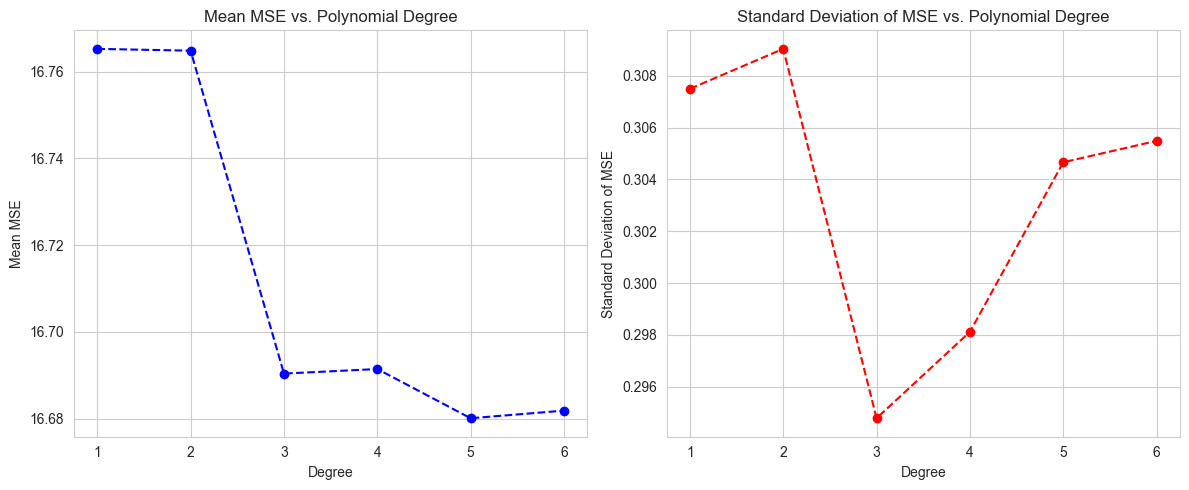

In [37]:
degrees = list(range(1, 7))

# Plot for Mean RMSE vs. Polynomial Degree
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(degrees, mean_rmses, color='blue')
plt.plot(degrees, mean_rmses, linestyle='--', color='blue')
plt.xlabel('Degree')
plt.ylabel('Mean MSE')
plt.title('Mean MSE vs. Polynomial Degree')
plt.grid(True)

# Plot for Standard Deviation of RMSE vs. Polynomial Degree
plt.subplot(1, 2, 2)
plt.scatter(degrees, std_rmses, color='red')
plt.plot(degrees, std_rmses, linestyle='--', color='red')
plt.xlabel('Degree')
plt.ylabel('Standard Deviation of MSE')
plt.title('Standard Deviation of MSE vs. Polynomial Degree')
plt.grid(True)

plt.tight_layout()
plt.show()

**Your comment:**<br>
Upon examining the graphs depicting the relationship between the degree of polynomial features and model performance, several conclusions can be drawn.

The graph of Mean MSE versus Polynomial Degree shows a discernible decline in the mean MSE as the polynomial degree increases from 1 to 3. Beyond the third degree, the mean MSE plateaus, indicating that increasing the polynomial degree further does not bring about significant improvement in the model's average performance in terms of mean squared error.

Concurrently, the graph of Standard Deviation of MSE versus Polynomial Degree provides insights into the variability of the model's performance across different polynomial degrees. There is a noticeable rise in the standard deviation of the MSE from the first to the third degree. This uptick signifies greater inconsistency in the model's performance as the polynomial degree increases. However, following its peak at the third degree, the standard deviation decreases until the fifth degree, after which it shows a slight increase.

Considering the insights from both graphs, the third degree appears to be the most suitable choice for polynomial features. This degree minimizes the mean MSE while ensuring the standard deviation remains relatively low compared to higher degrees.

### 4.5 (2 points) Discussion
Which of the above methods (Leave-One-Out Cross-Validation or k-Fold Cross-Validation) appears to be the most efficient for determining the appropriate degree of polynomial features? Explain why you believe one method is more efficient than the other.<br>
**Discussion:**<br>
Upon analyzing the results from both Leave-One-Out Cross-Validation (LOOCV) and k-Fold Cross-Validation for a third-degree polynomial, distinctions in performance metrics are evident. The Mean RMSE for LOOCV stands at 14.140, which is notably lower than the 16.690 obtained from k-Fold Cross-Validation. This suggests that the model, on average, achieves better predictive accuracy with LOOCV for this particular dataset.

However, an equally important aspect to consider is the model's consistency, which can be inferred from the standard deviation of the RMSE. LOOCV records a considerably higher standard deviation of 8.866 compared to the 0.295 from k-Fold Cross-Validation. This large disparity implies that while LOOCV might produce superior average results, the outcomes vary significantly from one test to another. Conversely, the model's performance remains relatively consistent under k-Fold Cross-Validation, as indicated by its lower standard deviation.

Efficiency in model validation not only depends on the predictive accuracy but also the reliability of those predictions across various tests. While LOOCV offers better average performance in terms of RMSE, its high variability might raise concerns regarding its consistency in real-world applications. On the other hand, k-Fold Cross-Validation, despite having a slightly higher mean RMSE, presents a much more stable and consistent performance, making its predictions more reliable.

In conclusion, based on the provided data, k-Fold Cross-Validation seems to be the more efficient method for determining the appropriate degree of polynomial features. This assessment is grounded in its capability to offer a favorable balance between predictive accuracy and consistency, ensuring that the model's performance can be reliably anticipated in varied scenarios.

# Question 5 (32 points): CV & Model Assessment & Selection

### Load data
Note: the data provided here has been preprocessed.

In [38]:
# Load data from file
# DO NOT CHANGE THIS (needed for grading)
infile_name = 'house_sales_norm.csv'
df5 = pd.read_csv(infile_name)

# Use a subset of the columns as features
selected_feature_names = ['SqFtTotLiving_norm','SqFtLot_norm','Bathrooms','Bedrooms','TrafficNoise']
target_name = 'AdjSalePrice'
X = df5[selected_feature_names]
y = df5[target_name]

### 5.1 (1 points) Create a held-aside set
Split into 80% train and 20% test using train_test_split and random_state=42 <br>

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### 5.2 (6 points) Baseline
- Measure baseline performance using DummyRegressor
- Calculate and print RMSE training set error
- Calculate and print the R2 training set
- Calculate and print the mean 5-fold cross valication R2 score <br>

In [40]:
# Initialize and fit the DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)

# Predict on the training set
y_train_pred = dummy_regr.predict(X_train)

# Compute RMSE for the training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"RMSE (Training set): {rmse_train:.2f}")

# Compute R2 score for the training set
r2_train = r2_score(y_train, y_train_pred)
print(f"R2 Score (Training set): {r2_train:.2f}")

# Compute mean 5-fold cross-validation R2 score
cross_val_scores = cross_val_score(dummy_regr, X_train, y_train, cv=5, scoring='r2')
mean_cross_val_score = np.mean(cross_val_scores)
print(f"Mean 5-Fold Cross-Validation R2 Score: {mean_cross_val_score:.2f}")

RMSE (Training set): 2.16
R2 Score (Training set): 0.00
Mean 5-Fold Cross-Validation R2 Score: -0.00


### 5.3 (6 points) Model
- Measure performance using LinearRegression
- Calculate RMSE training set error of the linear model
- Calculate and print the R2 training set score of the linear model
- Calculate mean 5-fold Cross Validation R2 score of the linear model on the training set using cross_val_score

In [41]:
# Initialize and fit the LinearRegression model
linear_regr = LinearRegression()
linear_regr.fit(X_train, y_train)

# Predict on the training set
y_train_pred_linear = linear_regr.predict(X_train)

# Compute RMSE for the training set
rmse_train_linear = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))
print(f"RMSE (Training set, Linear Regression): {rmse_train_linear:.2f}")

# Compute R2 score for the training set
r2_train_linear = r2_score(y_train, y_train_pred_linear)
print(f"R2 Score (Training set, Linear Regression): {r2_train_linear:.2f}")

# Compute mean 5-fold cross-validation R2 score for Linear Regression
cross_val_scores_linear = cross_val_score(linear_regr, X_train, y_train, cv=5, scoring='r2')
mean_cross_val_score_linear = np.mean(cross_val_scores_linear)
print(f"Mean 5-Fold Cross-Validation R2 Score (Linear Regression): {mean_cross_val_score_linear:.2f}")

RMSE (Training set, Linear Regression): 1.58
R2 Score (Training set, Linear Regression): 0.46
Mean 5-Fold Cross-Validation R2 Score (Linear Regression): 0.46


### 5.4 (10 points) Model selection
- Train an `Elastic Net` model using regularization
- Perform GridSearch over different proportions of the l1_ratio = [.1,.5,.9,1] using the training set
- The only parameter in our search is this l1_ratio
- Print out the best R2 score found using grid search and the best parameter setting found
- Using the best parameter setting found via cross validation in the step before calculate and print the mean 5-fold cv R2 score on the training set
- Retrain the ElasticNet model on the full training set and get predictions on the full training set
- Plot predictions (x-axis) vs residuals (y-axis) using plt.scatter() with alpha=0.2
Set axis names appropriately <br>
recall: residual = y_hat - y <br>

Best R2 Score from GridSearchCV: 0.30
Best Parameter Setting (l1_ratio): 0.1
Mean 5-Fold Cross-Validation R2 Score (ElasticNet with best l1_ratio): 0.30


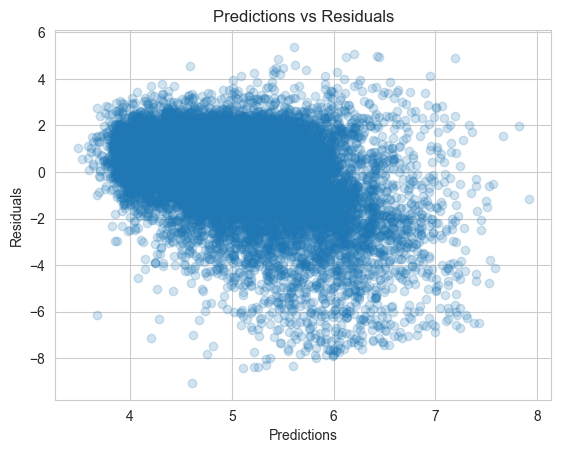

In [42]:
# Define the parameter grid for l1_ratio
param_grid = {'l1_ratio': [.1, .5, .9, 1]}

# Initialize the ElasticNet model
elastic_net = ElasticNet()

# Initialize GridSearchCV with the model, parameter grid, and scoring method
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='r2')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best R2 score and corresponding best parameter
print(f"Best R2 Score from GridSearchCV: {grid_search.best_score_:.2f}")
print(f"Best Parameter Setting (l1_ratio): {grid_search.best_params_['l1_ratio']}")

# Compute mean 5-fold cross-validation R2 score using best parameter
cross_val_scores_elastic = cross_val_score(ElasticNet(l1_ratio=grid_search.best_params_['l1_ratio']), X_train, y_train, cv=5, scoring='r2')
mean_cross_val_score_elastic = np.mean(cross_val_scores_elastic)
print(f"Mean 5-Fold Cross-Validation R2 Score (ElasticNet with best l1_ratio): {mean_cross_val_score_elastic:.2f}")

# Retrain the ElasticNet model on the full training set
elastic_net_best = ElasticNet(l1_ratio=grid_search.best_params_['l1_ratio'])
elastic_net_best.fit(X_train, y_train)

# Get predictions on the full training set
y_train_pred_elastic = elastic_net_best.predict(X_train)

# Compute residuals
residuals = y_train_pred_elastic - y_train

# Plot predictions vs residuals
plt.scatter(y_train_pred_elastic, residuals, alpha=0.2)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Predictions vs Residuals")
plt.show()

### 5.5 (3 points) Evaluate trained models on Test
- Calculate and print dummy test RMSE, lr test RMSE, ElasticNet test RMSE

In [43]:
# DummyRegressor predictions on the test set
y_test_pred_dummy = dummy_regr.predict(X_test)
rmse_test_dummy = np.sqrt(mean_squared_error(y_test, y_test_pred_dummy))
print(f"Dummy Test RMSE: {rmse_test_dummy:.2f}")

# LinearRegression predictions on the test set
y_test_pred_linear = linear_regr.predict(X_test)
rmse_test_linear = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))
print(f"Linear Regression Test RMSE: {rmse_test_linear:.2f}")

# ElasticNet predictions on the test set
y_test_pred_elastic = elastic_net_best.predict(X_test)
rmse_test_elastic = np.sqrt(mean_squared_error(y_test, y_test_pred_elastic))
print(f"ElasticNet Test RMSE: {rmse_test_elastic:.2f}")

Dummy Test RMSE: 2.15
Linear Regression Test RMSE: 1.58
ElasticNet Test RMSE: 1.80


### 5.6 (6 points) Feature selection
- Using the ElasticNet model we trained before, what features have a non-zero coefficient?
- Now, select the top 3 most informative features from the trained model 
hit: using SelectKBest and the f_regression metric
- Print out the selected features using skb.get_support() and the column names from X_train_r. In this case, they should match the features kept by the ElasticNet model

In [44]:
# Features with non-zero coefficients in the ElasticNet model
non_zero_coef_features = np.array(selected_feature_names)[elastic_net_best.coef_ != 0]
print(f"Features with non-zero coefficients (ElasticNet): {non_zero_coef_features}")

Features with non-zero coefficients (ElasticNet): ['SqFtTotLiving_norm' 'Bathrooms' 'Bedrooms']


In [45]:
# Use SelectKBest with f_regression metric to select the top 3 features
skb = SelectKBest(f_regression, k=3)
X_train_r = X_train[non_zero_coef_features]  # Ensure we're using the reduced feature set from ElasticNet
skb.fit(X_train_r, y_train)

# Get the selected feature names
selected_features_skb = np.array(non_zero_coef_features)[skb.get_support()]
print(f"Top 3 most informative features (SelectKBest): {selected_features_skb}")

Top 3 most informative features (SelectKBest): ['SqFtTotLiving_norm' 'Bathrooms' 'Bedrooms']


In [46]:
# Check if the selected features match
if set(non_zero_coef_features) == set(selected_features_skb):
    print("The features selected by ElasticNet match those selected by SelectKBest!")
else:
    print("The features selected by ElasticNet don't match those selected by SelectKBest.")

The features selected by ElasticNet match those selected by SelectKBest!
